El objetivo de esta práctica es implementar un clasificador Naive Bayes. En particular, vamos a emplear uan base de datos de diabetes disponible en Kaggle, donde se indica si una persona es o no diabética (columna Outcome), así como un conjunto de variables relacionadas con la diabetes: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI (Body Mass Index)', 'DiabetesPedigreeFunction' y 'Age'.

Nuestro objetivo es hacer un clasificador que nos permita determinar si una persona con un conjunto determinado de estas variables es o no diabética. Esta base de datos.

Para empezar, cargaremos el dataset y todas las librerías necesarias y comprobaremos el tipo de las variables.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Load the dataset
url = "https://raw.githubusercontent.com/crisurdiales/DataMining4SmartCities/main/diabetes.csv"
df = pd.read_csv(url)
# Convertir Outcome en categorica (T/F)
# Convertir Outcome en categorica (T/F)

print(df.dtypes)

Para trabajar, necesitamos preprocesar un poco el dataset.

Primero, convertiremos la variable dependiente en categórica (T/F), ya que originalmente es 0 (no diabético) o 1 (diabético).

Si analizamos el contenido del df, veremos que algunas variables independientes tienen valores 0, lo cual es imposible en un ser humano vivo. Por tanto, asumiremos que se trata de variables que se desconocen y las sustituiremos por NaN.

Finalmente, comprobaremos qué valores nos faltan y los imputaremos usando un algoritmo Random Forest a partir de los valores del resto. Llegado este punto, ya tendremos un dataset completo que procesar.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


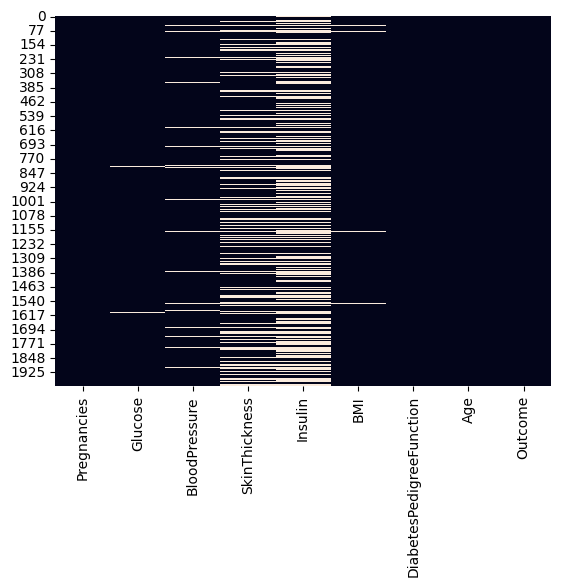

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
#pasamos outcome a categórico (T/F)
df['Outcome'] = df['Outcome'].replace({0: "False", 1: "True"})


# Cambiamos 0 (valores imposibles) por NaN en las columnas de biomarcadores
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

# Comprobamos si faltan valores
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Imputamos los valores que faltan usanndo Random Forest
mice_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df_imputed = mice_imputer.fit_transform(df[cols])
df[cols] = df_imputed

Podemos comprobar que los datos que tenemos son razonables mediante sus histogramas. Por ejemplo, es inmediato comprobar que los niveles medios de glocosa en las personas no diabéticas son bastante más bajos y menos variados que en las personas diabéticas, como cabía esperar.

In [10]:
# Age Distribution by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
plt.title('Age Distribution by Outcome')
plt.show()

# Pregnancy Distribution by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, bins=20)
plt.title('Pregnancy Distribution by Outcome')
plt.show()

# BMI Distribution by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)
plt.title('BMI Distribution by Outcome')
plt.show()

# Glucose Distribution by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)
plt.title('Glucose Distribution by Outcome')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Puede llamar la atención que el plot de embarazos llega hasta 17, que es un número elevadísimo, pero es inmediato comprobar que el el df original ya tenía ese valor.

In [ ]:
df2 = pd.read_csv(url)
# Visualización de la distribución original de "Pregnancies" y su valor máximo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, y='Pregnancies')
plt.title('Distribución Original de "Pregnancies"')
plt.xlabel('Pregnancies')
plt.ylabel('Número de Embarazos')
plt.show()

# Valor máximo de "Pregnancies" en el dataset original
max_pregnancies = df2['Pregnancies'].max()
print("Valor máximo de 'Pregnancies' en el dataset original:", max_pregnancies)

Una segunda forma de ver los mismos resultados, además de la relación de las variables dos a dos, es emplear un scatterplot. En este caso no hay relaciones muy obvias entre ningún par de variables, todo lo más cierta linealidad entre BMI y skin thickness, pero tal vez con conocimiento médico se podrían interpretar mejor estos resultados.

In [ ]:
# Scatterplot Matrix
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

Asumiendo que los datos son coherentes llegado este punto, ya podemos separarlos en un conjunto de entrenamiento y otro de test, ajustar un modelo de Naive Bayes con los primeros y comprobar la predicción de los segundos empleando, por ejemplo, la matriz de confusión.

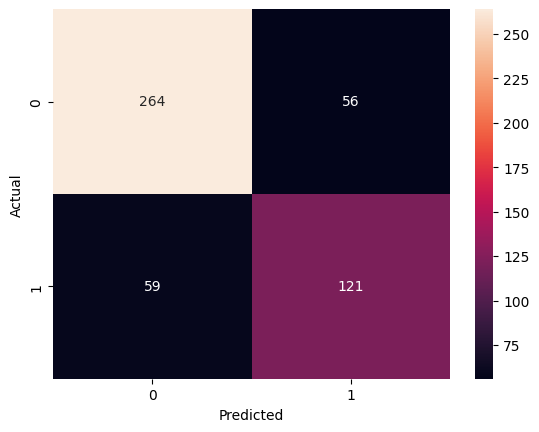

In [11]:
# Splitting the data into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

Matriz de Confusión: (TN, FP, FN, TP)
[[264  56]
 [ 59 121]]
Precisión: 0.77
Sensibilidad: 0.6722222222222223
Especificidad: 0.825


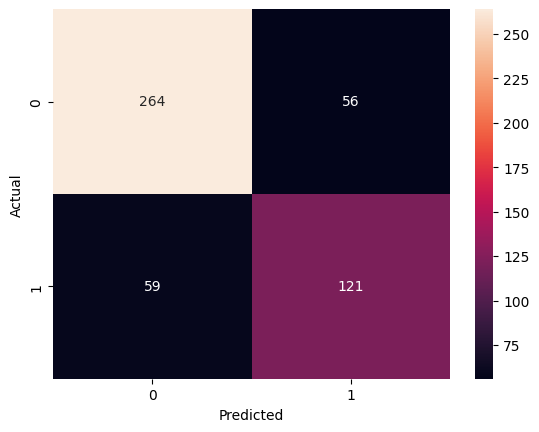

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación como precisión, sensibilidad y especificidad
precision = (cm[1, 1] + cm[0, 0]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Matriz de Confusión: (TN, FP, FN, TP)")
print(cm)
print("Precisión:", precision)
print("Sensibilidad:", sensitivity)
print("Especificidad:", specificity)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

La precisión final es del 77%, pero el sistema es mejor detectando negativos que positivos. Se puede comprobar que el número de TN es de 264 sobre 320, mientras que los TP son 121 sobre 180.